In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/SHAI/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [56]:
# Task 1

rows = df.shape[0]
columns = df.shape[1]
columns_type = df.dtypes
mis = df.isnull()
mis_sum = df.isnull().sum()
mis_sum = sorted(mis_sum, reverse=True)

print("---------------------------------------------------------------------------------")
print("Number of rows: ", rows)
print("Number of columns: ", columns)
print("Columns type: \n", columns_type)
print("Missing values: \n", mis)
print("Sum of missing values: \n", mis_sum)
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
Number of rows:  148654
Number of columns:  13
Columns type: 
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
Missing values: 
            Id  EmployeeName  JobTitle  BasePay  OvertimePay  OtherPay  \
0       False         False     False    False        False     False   
1       False         False     False    False        False     False   
2       False         False     False    False        False     False   
3       False         False     False    False        False     False   
4       False         False     False    False        False     False   
...       ...        

In [57]:
# Task 2

describe = df.describe()
mean = df["TotalPay"].mean()
median = df["TotalPay"].median()
mode = df["TotalPay"].mode()
minimum = df["TotalPay"].min()
maximum = df["TotalPay"].max()
range = maximum - minimum
deviation = df["TotalPay"].std()

print("---------------------------------------------------------------------------------")
print("Mean of salary: ", mean)
print("Median of salary: ", median)
print("Mode of salary: ", mode)
print("Minimum of salary: ", minimum)
print("Maximum of salary: ", maximum)
print("Range of salary: ", range)
print("Deviation of salary: ", deviation)
print("---------------------------------------------------------------------------------")

---------------------------------------------------------------------------------
Mean of salary:  74768.32197169267
Median of salary:  71426.60999999999
Mode of salary:  0    0.0
Name: TotalPay, dtype: float64
Minimum of salary:  -618.13
Maximum of salary:  567595.43
Range of salary:  568213.56
Deviation of salary:  50517.00527394987
---------------------------------------------------------------------------------


In [64]:
# Task 3

df['JobTitle'].fillna(df['JobTitle'].mode()[0], inplace= True)
df['BasePay'].fillna(df['BasePay'].mean(), inplace = True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace= True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace= True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace= True)
df['TotalPay'].fillna(df['TotalPay'].mean(), inplace= True)
df['TotalPayBenefits'].fillna(df['TotalPayBenefits'].mean(), inplace= True)
df['Year'].fillna(df['Year'].mode()[0], inplace= True)
df['Notes'].fillna('No Notes', inplace= True)
df['Agency'].fillna(df['Agency'].mode()[0], inplace= True)
df['Status'].fillna('No Satatus', inplace= True)

df.isnull().sum()

'''
we use pandas.fillna() method beacuse can replace NAN values with a specific value,
in our case we use mean for numerical columns and most repeated value in a column
for text columns.

'''

'\nwe use pandas.fillna() method beacuse can replace NAN values with a specific value,\nin our case we use mean for numerical columns and most repeated value in a column\nfor text columns.\n \n'

([<matplotlib.patches.Wedge at 0x7ec364ae42b0>,
 [Text(0.2261829442861425, 1.076494902781268, 'POLICE DEPARTMENT'),
  Text(-1.0158847274211267, -0.4218746503317107, 'FIRE DEPARTMENT'),
  Text(0.09579754348351723, -1.09582061974692, 'CIVIL & CRIMINAL'),
  Text(0.6681392617673267, -0.8738363272861869, 'CIVIL/CRIMINAL'),
  Text(0.8378724418685655, -0.7127199808881518, 'MFCC'),
  Text(0.9528498742181625, -0.5496154266416037, 'SEASONAL'),
  Text(1.0204226369846394, -0.4107768760888504, 'Fire Dept'),
  Text(1.061535202550025, -0.2883453029738427, 'Cvl&Crmnl'),
  Text(1.0833142118797008, -0.19086727938403417, 'Civil & Criminal'),
  Text(1.093616153539355, -0.11833726681728902, 'SFERS'),
  Text(1.0979838139971232, -0.06656984452686539, 'Police Department'),
  Text(1.0994119519528889, -0.03596331329478293, 'Civil/Criminal'),
  Text(1.0999193282991864, -0.013321832976985753, 'Seasonal'),
  Text(1.099999193205479, -0.0013322714796078416, 'Fire Department')],
 [Text(0.12337251506516862, 0.58717903

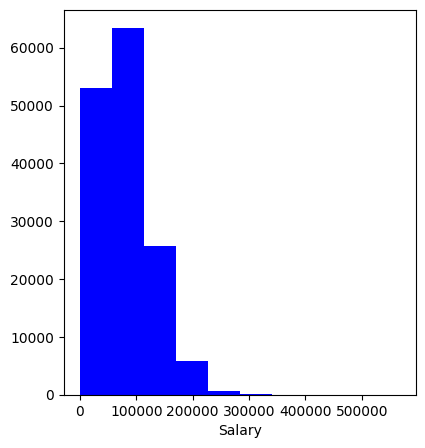

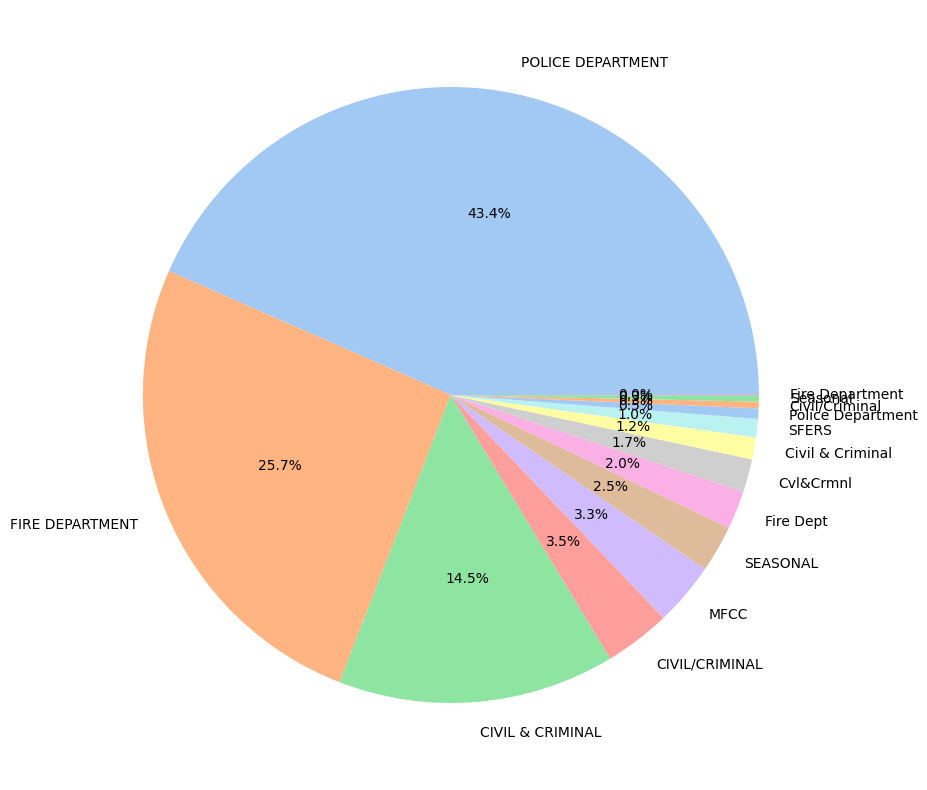

In [60]:
# Task 4

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(df['TotalPay'], bins= 10, color= 'blue')
plt.xlabel('Salary')

plt.figure(figsize= (30, 10))
dep_dict = {}
proportion = []

import re
pattern = r'\((.*?)\)'
for i in df['JobTitle']:
  res = re.findall(pattern, i)
  if res is not None:
    for j in res:
      if j not in dep_dict:
        dep_dict[j] = 1
      else:
        dep_dict[j] += 1
      proportion.append(j)
  elif res is None and i not in dep_dict:
    dep_dict[i] = 1
    proportion.append(i)
  elif res is None and i in dep_dict:
    dep_dict[i] += 1
    proportion.append(i)

departments = list(dep_dict.keys())

departments = pd.Series(departments)
proportion = pd.Series(proportion)
plt.pie(proportion.value_counts(), labels=departments.unique(),
        autopct='%1.1f%%', colors=sns.color_palette('pastel'))

In [61]:
# Task 5

grouped = df.groupby(['JobTitle', 'Agency'])['TotalPay'].mean()
print(grouped)

JobTitle                                        Agency       
ACCOUNT CLERK                                   San Francisco    44035.664337
ACCOUNTANT                                      San Francisco    47429.268000
ACCOUNTANT INTERN                               San Francisco    29031.742917
ACPO,JuvP, Juv Prob (SFERS)                     San Francisco    62290.780000
ACUPUNCTURIST                                   San Francisco    67594.400000
                                                                     ...     
X-RAY LABORATORY AIDE                           San Francisco    52705.880385
X-Ray Laboratory Aide                           San Francisco    50823.942700
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS  San Francisco    53632.870000
Youth Comm Advisor                              San Francisco    41414.307500
ZOO CURATOR                                     San Francisco    66686.560000
Name: TotalPay, Length: 2159, dtype: float64


The correlation between salary and year:  0.03209039798559024


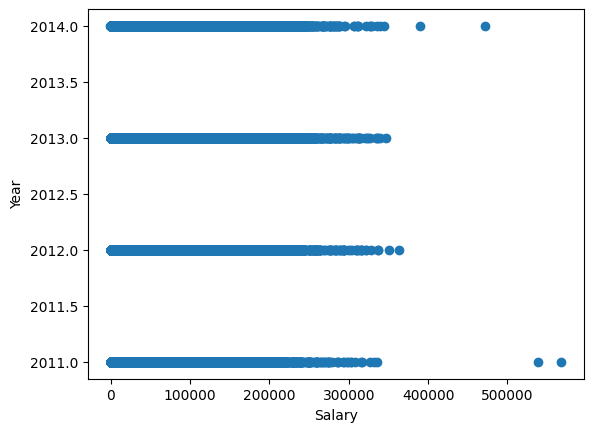

In [62]:
# Task 6

correlation = df['TotalPay'].corr(df['Year'])
print('The correlation between salary and year: ', correlation)

plt.scatter(df['TotalPay'], df['Year'])
plt.xlabel('Salary')
plt.ylabel('Year')
plt.show()

In [63]:
# Task 7

'''

Task 1:

indentifing the number of rows and columns by pandas.shap() method by pathing paramerters 0 to indicate
the rows and 1 to indicate the columns.
determine the data types of each column by pandas.dtypes method.
checking for missing values in each column by pandas.isnull() method then sorted it by sorted() method.

Task 2:

calculating basic statistics:
first of all we call pandas.describe() method and store it in describe variable, then for TotalPar column:
mean: by using pandas.mean() method
median: by using pandas.median() method
mode: by using pandas.mode() method
minimum: by using pandas.min() method
maximum: by using pandas.max() method
the range of salaries: by calculate this (maximum - minimum)
standard deviation: by using pandas.std() method

Task 3:

Handling missing data:
for each column has missing values we use pandas.fillna() method with two parameters, the first is
the value which we want to fill with where for the numerical columns we fill with the mean of the
column and for text columns we fill with the most repeated value by pandas.mode() method and the
second is inplace= true to repalce the original data.

Task 4:

we use plt.figure() method with parameter figsize to create figure for the salary histogram, we do
subplot in the figure then we use plt.hist() method for TotalPay column.
for pie chart of represent the proportion of employees in different departments we extracted the departments
without duplication then we use plt.pie() to draw pie chart.

Task 5:

we grouped the data by 'JobTitle' and 'Agency' columns, this done by pandas.groupby() method then take
'TotalPay' column and calculate the average.

Task 6:

correlation between salary and another numerical column by pandas.corr() method where call it for TotalPay
column and path to it the another column (year column), then use plt.scatter() method to plot a scatter plot.

'''

"\n\nTask 1:\n\nindentifing the number of rows and columns by pandas.shap() method by pathing paramerters 0 to indicate \nthe rows and 1 to indicate the columns.\ndetermine the data types of each column by pandas.dtypes method.\nchecking for missing values in each column by pandas.isnull() method then sorted it by sorted() method.\n\nTask 2:\n\ncalculating basic statistics:\nfirst of all we call pandas.describe() method and store it in describe variable, then for TotalPar column:\nmean: by using pandas.mean() method\nmedian: by using pandas.median() method\nmode: by using pandas.mode() method\nminimum: by using pandas.min() method\nmaximum: by using pandas.max() method\nthe range of salaries: by calculate this (maximum - minimum)\nstandard deviation: by using pandas.std() method\n\nTask 3:\n\nHandling missing data:\nfor each column has missing values we use pandas.fillna() method with two parameters, the first is \nthe value which we want to fill with where for the numerical columns we